In [1]:
print(u"\x0B")

In [2]:
print(u"\x41\x0A\x42\x0C\x43\x00\x44")
print(u"\x41\x0D\x45\x46\x20\x47")

A
BC D
EF G


In [3]:
print(u"\x14\x35")

5


In [4]:
print(u"\x28\x29\x3C\x3E\x25")

()<>%


In [5]:
b'\x28'.decode("utf-8") == '('

True

In [6]:
print('\123\124\0321')

ST1


In [7]:
print(u"\x4E\x6F\x76\x20\x73\x68\x6D\x6f\x7a\x20\x6b\x61\x20\x70\66ffx70\x2e")
print(u"\x90\x1f\xa0")

Nov shmoz ka p6ffx70.
 


In [8]:
b'\x4E\x6F\x76\x20\x73\x68\x6D\x6f\x7a\x20\x6b\x61\x20\x70\66ffx70\x2e'.decode("utf-8")

'Nov shmoz ka p6ffx70.'

In [15]:
import io
import numpy as np
import cv2
import fitz
from PIL import Image
from matplotlib import pyplot as plt

In [10]:
#doc = fitz.open("resource/ANA領収書.pdf")

In [11]:
page = doc[0]

NameError: name 'doc' is not defined

In [12]:
pix = page.get_pixmap()

NameError: name 'page' is not defined

In [13]:
#pix.save("resource/pdf2pix.png")
#img = cv2.imread("resource/pdf2pix.png")
img = np.asarray(Image.open(io.BytesIO(pix.tobytes())))

NameError: name 'pix' is not defined

In [14]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
nega_img = cv2.bitwise_not(gray_img)

NameError: name 'img' is not defined

In [15]:
plt.imshow(nega_img, cmap="gray")
plt.show()

NameError: name 'nega_img' is not defined

In [16]:
lines = cv2.HoughLinesP(nega_img, rho=1, theta=np.pi/360, threshold=80, minLineLength=50, maxLineGap=0)

NameError: name 'nega_img' is not defined

In [17]:
lines.__len__()

NameError: name 'lines' is not defined

NameError: name 'gray_img' is not defined

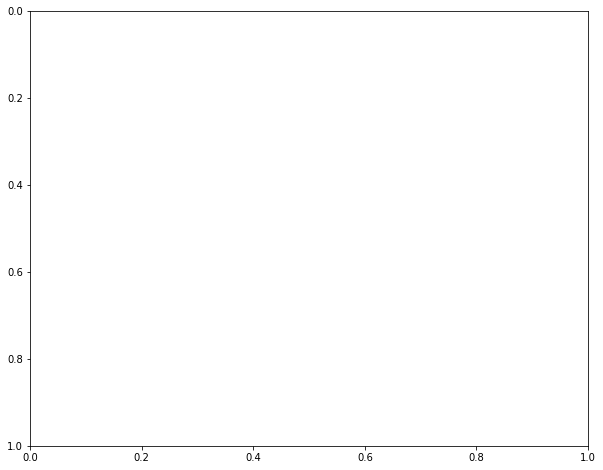

In [18]:
fig = plt.figure(figsize=(10,8))
plt.gca().invert_yaxis()
plt.imshow(gray_img, cmap="gray")
for line in lines:
    line = line[0]
    plt.plot([line[0],line[2]], [line[1], line[3]], color="red")
plt.show()

In [19]:
help(page.get_pixmap)

NameError: name 'page' is not defined

In [20]:
# constants
white = np.array([255,255,255])
white_threshold_dist = 88


def check_index(matrix, loc):
    max_row = matrix.shape[0]
    max_col = matrix.shape[1]
    return 0 <= loc[0] <= max_row and 0 <= loc[1] <= max_col

def group_cls_joints(figure_cls_joints):
    figure_cls_groups = []
    while True:
        try:
            joint = figure_cls_joints.pop()
        except IndexError:
            break
        cls1, cls2 = joint
        cls1_group = cls2_group = None
        for cls_group in figure_cls_groups: 
            if cls1 in cls_group:
                cls1_group = cls_group
            if cls2 in cls_group:
                cls2_group = cls_group
            if cls1_group is not None and cls2_group is not None:
                break
        if cls1_group is not None and cls2_group is not None:
            if cls1_group == cls2_group:
                continue
            new_group = cls1_group.union(cls2_group)
            figure_cls_groups.remove(cls1_group)
            figure_cls_groups.remove(cls2_group)
            figure_cls_groups.append(new_group)
        elif cls1_group is not None:
            new_group = cls1_group.union(joint)
            figure_cls_groups.remove(cls1_group)
            figure_cls_groups.append(new_group)
        elif cls2_group is not None:
            new_group = cls2_group.union(joint)
            figure_cls_groups.remove(cls2_group)
            figure_cls_groups.append(new_group)
        else:
            figure_cls_groups.append(set(joint))
    return figure_cls_groups


# def explore_figure(image, figure, loc, has_explored):
#     if (not check_index(has_explored, loc)) or has_explored[loc]:
#         return
#     if np.linalg.norm(img[loc] - white) > white_threshold_dist:
#         figure.append(loc)
#         has_explored[loc] = True
#         explore_figure(image, figure, (loc[0]+1, loc[1]), has_explored)  # below pixel
#         explore_figure(image, figure, (loc[0], loc[1]+1), has_explored)  # right pixel
#         explore_figure(image, figure, (loc[0]-1, loc[1]), has_explored)  # upper pixel
#         explore_figure(image, figure, (loc[0], loc[1]-1), has_explored)  # left pixel
#     else:
#         return
    
#     for 


row, col, _ = img.shape
figures = []
figure_counter = 0
figure_classifier = np.full(img.shape[:2], -1)
figure_cls_joints = []

for r in range(row):
    for c in range(col):
        upper = (r-1,c)
        left  = (r,c-1)
        upper_cls = figure_classifier[upper] if check_index(img, upper) else -1
        left_cls  = figure_classifier[left]  if check_index(img, left)  else -1
        
        if np.linalg.norm(img[r,c] - white) > white_threshold_dist:
            if upper_cls != -1 and left_cls != -1 and upper_cls != left_cls:
                # This pixel is a joint pixel of 2 figures
                cls1 = min(upper_cls, left_cls)
                cls2 = max(upper_cls, left_cls)
                figure_cls_joints.append( (cls1,cls2) )
                figure_classifier[r,c] = min(upper_cls, left_cls)
            elif upper_cls != -1:
                # This pixel is a component of the figure of the upper pixel
                figure_classifier[r,c] = upper_cls
            elif left_cls != -1:
                # This pixel is a component of the figure of the left  pixel
                figure_classifier[r,c] = left_cls
            else:
                # A pixel which might be a component of a new figure
                figure_classifier[r,c] = figure_counter
                figure_counter += 1
                

print(f"figure_counter = {figure_counter}")
print("figure_cls_joints:")
print(figure_cls_joints)
plt.imshow(figure_classifier)
plt.show()

figure_cls_groups = group_cls_joints(figure_cls_joints)


for r in range(row):
    for c in range(col):
        cls = figure_classifier[r,c]
        for new_cls, cls_group in enumerate(figure_cls_groups):
            if cls in cls_group:
                figure_classifier[r,c] = new_cls

print(figure_cls_groups)
print(figure_classifier)

NameError: name 'img' is not defined

In [21]:
len(figure_cls_groups)
fig = plt.figure(figsize=(10,8))
plt.imshow(figure_classifier, cmap="gray")
plt.show()

NameError: name 'figure_cls_groups' is not defined

In [22]:
pix2 = page.get_pixmap(dpi=100)
pix2.save("resource/pdf2pix02.png")

NameError: name 'page' is not defined

In [2]:
#_img2 = Image.open("resource/pdf2pix02.png")
img2 = np.array(_img2)

NameError: name 'np' is not defined

In [3]:
_img2.close()

NameError: name '_img2' is not defined

In [4]:
%matplotlib notebook
plt.imshow(img2);plt.show()

NameError: name 'plt' is not defined

In [5]:
def get_drawing_pix(page):
    paths = page.get_drawings()  # extract existing drawings
    outpdf = fitz.open()
    outpage = outpdf.new_page(width=page.rect.width, height=page.rect.height)
    shape = outpage.new_shape()  # make a drawing canvas for the output page

    for path in paths:
        for item in path["items"]:  # these are the draw commands
            if item[0] == "l":  # line
                shape.draw_line(item[1], item[2])
            elif item[0] == "re":  # rectangle
                shape.draw_rect(item[1])
            elif item[0] == "qu":  # quad
                shape.draw_quad(item[1])
            elif item[0] == "c":  # curve
                shape.draw_bezier(item[1], item[2], item[3], item[4])
            else:
                raise ValueError("unhandled drawing", item)

        shape.finish(
            fill=path["fill"],  # fill color
            color=path["color"],  # line color
            dashes=path["dashes"],  # line dashing
            even_odd=path.get("even_odd", True),  # control color of overlaps
            closePath=path["closePath"],  # whether to connect last and first point
            lineJoin=path["lineJoin"],  # how line joins should look like
            lineCap=max(path["lineCap"]),  # how line ends should look like
            width=path["width"],  # line width
            stroke_opacity=path.get("stroke_opacity", 1),  # same value for both
            fill_opacity=path.get("fill_opacity", 1),  # opacity parameters
            )
    shape.commit()
    return outpage.get_pixmap()

pixmap = get_drawing_pix(page)
img = np.asarray(Image.open(io.BytesIO(pixmap.tobytes())))
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
ret, img_bin = cv2.threshold(img_gray, 210, 255, cv2.THRESH_BINARY)

%matplotlib inline
fig = plt.figure(figsize=(10,8))
plt.imshow(img_bin, cmap="gray")
plt.show()

NameError: name 'page' is not defined

In [6]:
paths = page.get_drawings()
outpdf2 = fitz.open()
outpage2 = outpdf2.new_page(width=page.rect.width, height=page.rect.height)
shape2 = outpage2.new_shape()
for path in paths:
    rect = path["rect"]
    if 650 < rect.x0 < 1200 and 650 < rect.x1 < 1200 and \
       200 < rect.y0 < 400  and 200 < rect.y1 < 400:
        print(f"---------{path['rect']}-------------")
        print(f"fill: {path['fill']}")
        for item in path["items"]:
            shape2.draw_rect(item[1])
        shape2.finish(
            fill=path["fill"],  # fill color
            color=path["color"],  # line color
            dashes=path["dashes"],  # line dashing
            even_odd=path.get("even_odd", True),  # control color of overlaps
            closePath=path["closePath"],  # whether to connect last and first point
            lineJoin=path["lineJoin"],  # how line joins should look like
            lineCap=max(path["lineCap"]),  # how line ends should look like
            width=path["width"],  # line width
            stroke_opacity=path.get("stroke_opacity", 1),  # same value for both
            fill_opacity=path.get("fill_opacity", 1),  # opacity parameters
        )
    shape2.commit()
partial_pixmap = outpage2.get_pixmap()
partial_img = np.asarray(Image.open(io.BytesIO(partial_pixmap.tobytes())))
partial_img_gray = cv2.cvtColor(partial_img, cv2.COLOR_RGB2GRAY)
ret, partial_img_bin = cv2.threshold(partial_img_gray, 210, 255, cv2.THRESH_BINARY)
plt.imshow(partial_img_bin, cmap="gray")
plt.show()

NameError: name 'page' is not defined

In [7]:
corners = cv2.cornerHarris(img_bin, 3, 3, 0.04)
corners = cv2.dilate(corners, None)
img_cp = img.copy()
img_cp[corners > corners.max()*0.01] = [255,0,0]

fig = plt.figure(figsize=(10,8))
#plt.imshow(img_cp[850:900,200:250])
plt.imshow(img_cp)
plt.show()

NameError: name 'cv2' is not defined

In [8]:
scaled = (corners - corners.min()) * 255 / (corners.max()-corners.min())
scaled = scaled.astype(np.uint8)
%matplotlib notebook
plt.imshow(scaled, cmap="gray")
plt.show()

NameError: name 'corners' is not defined

In [9]:
corner_centers = []

corners_bin = np.zeros_like(corners, dtype=np.uint8)
corners_bin[corners > corners.max()*0.1] = 255
corner_contours, corner_hierarchy = cv2.findContours(corners_bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

for cont in corner_contours:
    M = cv2.moments(cont)
    cx = M["m10"] / M["m00"]
    cy = M["m01"] / M["m00"]
    corner_centers.append([cx,cy])
corner_centers = np.array(corner_centers)
print(corner_centers.shape)

NameError: name 'np' is not defined

In [10]:
plt.scatter(corner_centers[:,0], np.ones(corner_centers.shape[0]))
plt.show()

NameError: name 'plt' is not defined

In [11]:
corners_cnt_img = np.zeros_like(corners_bin, dtype=np.uint8)
corners_cnt_img = cv2.drawContours(corners_cnt_img, corner_contours, -1, 255, 2)
%matplotlib notebook
plt.imshow(corners_cnt_img, cmap="gray")
plt.show()

NameError: name 'np' is not defined

In [12]:
contours_table, hierarchy_table = cv2.findContours(img_bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print(len(contours_table))
contours_table_img = np.zeros_like(img_bin, dtype=np.uint8)
contours_table_img = cv2.drawContours(contours_table_img, contours_table, -1, 255, -1)
plt.imshow(contours_table_img, cmap="gray")
plt.show()

NameError: name 'cv2' is not defined

<IPython.core.display.Javascript object>


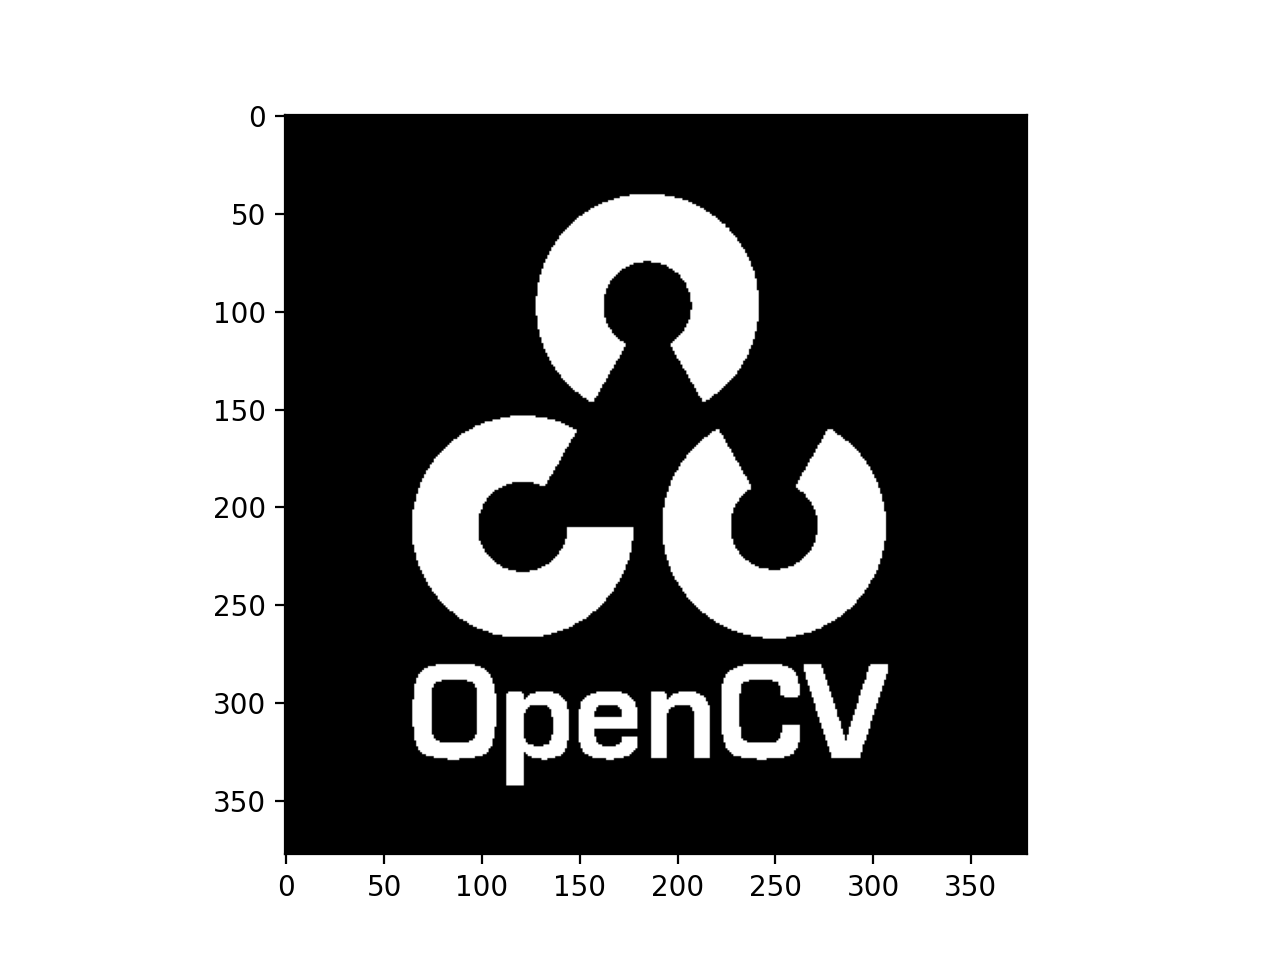

In [18]:
test_img = cv2.imread("resource/opencv.png")
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
test_img_gray = cv2.cvtColor(test_img, cv2.COLOR_RGB2GRAY)

ret, test_img_bin = cv2.threshold(test_img_gray, 127, 255, 0)
plt.imshow(test_img_bin, cmap="gray")

In [19]:
contours, hierarchy = cv2.findContours(test_img_bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

<IPython.core.display.Javascript object>


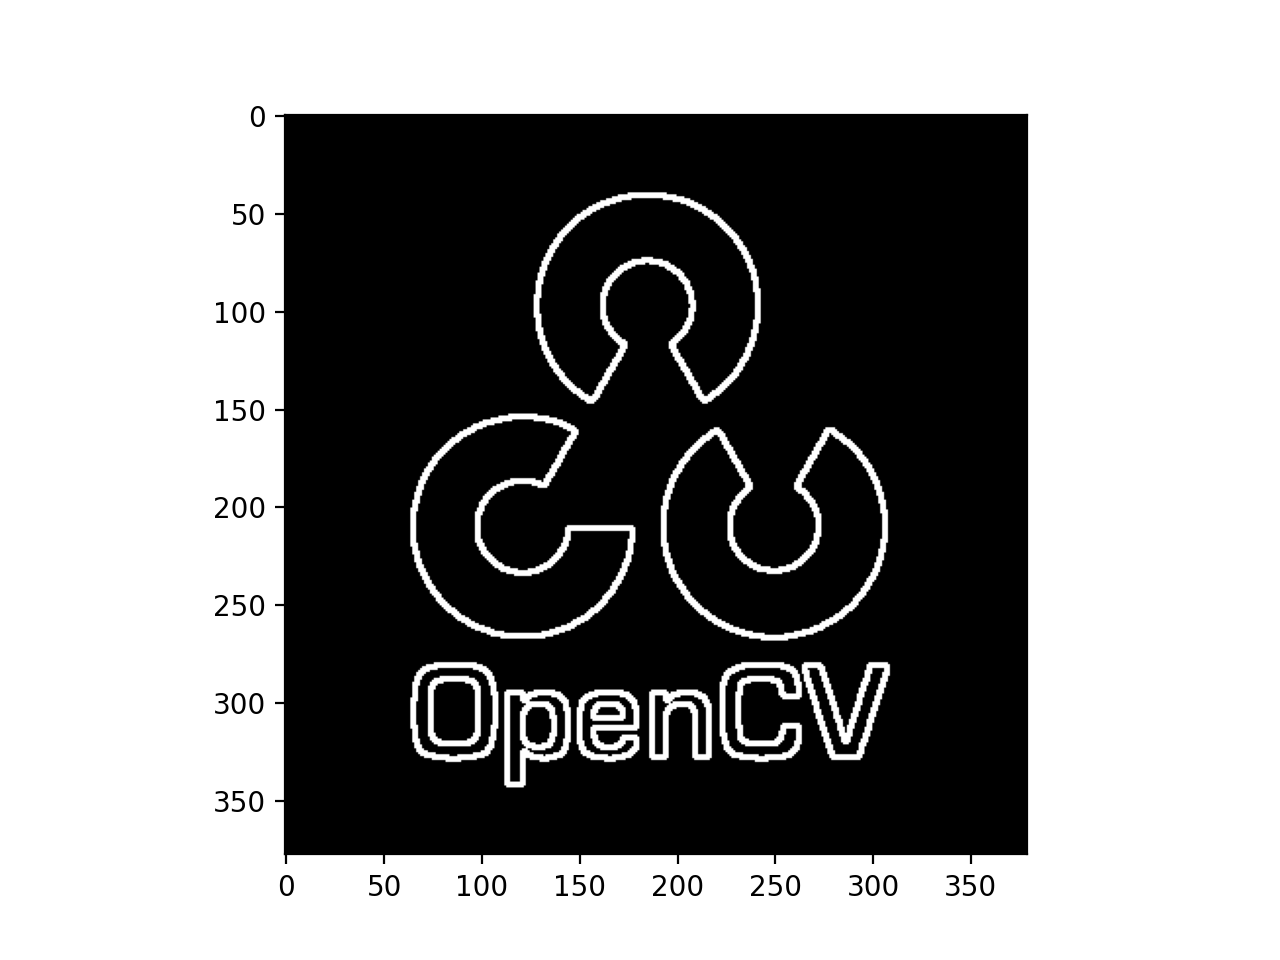

In [20]:
cnt_img = np.zeros_like(test_img_bin, dtype=np.uint8)
cnt_img = cv2.drawContours(cnt_img, contours, -1, 255, 2)
%matplotlib notebook
plt.imshow(cnt_img, cmap="gray")
plt.show()

12


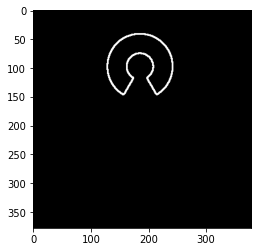

In [21]:
print(len(contours))
cnt_img = np.zeros_like(test_img_bin, dtype=np.uint8)
cnt_img = cv2.drawContours(cnt_img, contours, 11, 255, 2)
%matplotlib inline
plt.imshow(cnt_img, cmap="gray")
plt.show()

In [22]:
cnt = contours[11]
M = cv2.moments(cnt)
print(M)

{'m00': 7005.5, 'm10': 1293147.5, 'm01': 625488.1666666666, 'm20': 246294365.91666666, 'm11': 115440859.95833333, 'm02': 60851083.916666664, 'm30': 48267626590.850006, 'm21': 22035579640.083332, 'm12': 11228558672.616667, 'm03': 6346029109.25, 'mu20': 7591852.64049077, 'mu11': -18202.06501737237, 'mu02': 5004185.531108499, 'mu30': 1305261.314529419, 'mu21': 51833228.29247081, 'mu12': -712141.2543185949, 'mu03': 19321438.742378235, 'nu20': 0.1546925843274873, 'nu11': -0.00037088766220471075, 'nu02': 0.1019659401886588, 'nu30': 0.0003177602898898274, 'nu21': 0.012618577954314989, 'nu12': -0.00017336774552026435, 'nu03': 0.004703721705013629}


In [23]:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
print(f"moment center = ({cx}, {cy})")

moment center = (184, 89)


In [24]:
area = cv2.contourArea(cnt)
perimeter = cv2.arcLength(cnt, True)
print(f"area = {area}")
print(f"perimeter = {perimeter}")

area = 7005.5
perimeter = 509.77164113521576


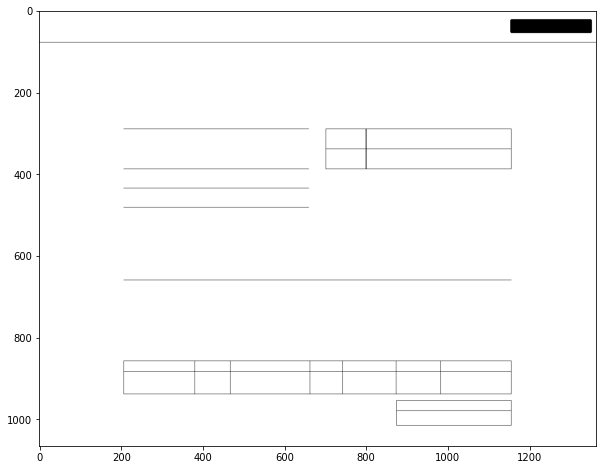

In [34]:
doc = fitz.open("resource/ANA領収書.pdf")
page = doc[0]

def get_drawing_pix(page):
    paths = page.get_drawings()  # extract existing drawings
    outpdf = fitz.open()
    outpage = outpdf.new_page(width=page.rect.width, height=page.rect.height)
    shape = outpage.new_shape()  # make a drawing canvas for the output page

    for path in paths:
        for item in path["items"]:  # these are the draw commands
            if item[0] == "l":  # line
                shape.draw_line(item[1], item[2])
            elif item[0] == "re":  # rectangle
                shape.draw_rect(item[1])
            elif item[0] == "qu":  # quad
                shape.draw_quad(item[1])
            elif item[0] == "c":  # curve
                shape.draw_bezier(item[1], item[2], item[3], item[4])
            else:
                raise ValueError("unhandled drawing", item)

        shape.finish(
            fill=path["fill"],  # fill color
            color=path["color"],  # line color
            dashes=path["dashes"],  # line dashing
            even_odd=path.get("even_odd", True),  # control color of overlaps
            closePath=path["closePath"],  # whether to connect last and first point
            lineJoin=path["lineJoin"],  # how line joins should look like
            lineCap=max(path["lineCap"]),  # how line ends should look like
            width=path["width"],  # line width
            stroke_opacity=path.get("stroke_opacity", 1),  # same value for both
            fill_opacity=path.get("fill_opacity", 1),  # opacity parameters
            )
    shape.commit()
    return outpage.get_pixmap()

pixmap = get_drawing_pix(page)
img = np.asarray(Image.open(io.BytesIO(pixmap.tobytes())))
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
ret, img_bin = cv2.threshold(img_gray, 210, 255, cv2.THRESH_BINARY)

%matplotlib inline
fig = plt.figure(figsize=(10,8))
plt.imshow(img_bin, cmap="gray")
plt.show()

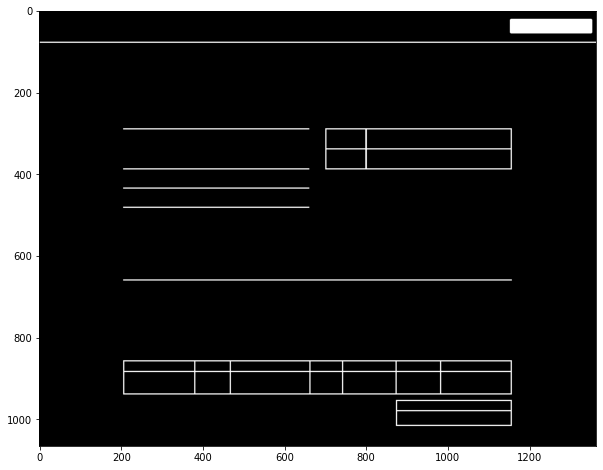

In [35]:
ret, img_bin_inv = cv2.threshold(img_gray, 210, 255, cv2.THRESH_BINARY_INV)
img_bin_dilate = cv2.dilate(img_bin_inv, None)
img_edge = cv2.Canny(img_bin_dilate, 10, 210)
fig = plt.figure(figsize=(10,8))
#plt.imshow(img_edge, cmap="gray")
plt.imshow(img_bin_dilate, cmap="gray")
plt.show()

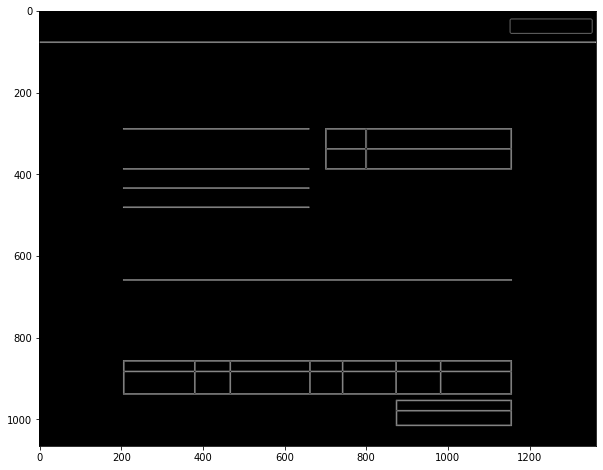

In [36]:
contours, hierarchy = cv2.findContours(img_bin_dilate, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#contours, hierarchy = cv2.findContours(img_edge, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img_cp = np.zeros_like(img_edge)
cv2.drawContours(img_cp, contours, -1, 255, 1)
fig = plt.figure(figsize=(10,8))
plt.imshow(img_cp, cmap="gray");plt.show()

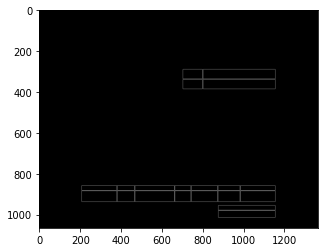

In [37]:
from collections import defaultdict

def get_bbox(contour):
    min_x = contour[:,0,0].min()
    max_x = contour[:,0,0].max()
    min_y = contour[:,0,1].min()
    max_y = contour[:,0,1].max()
    return (min_x, min_y, max_x, max_y)


cells = defaultdict(list)
img_cp = np.zeros_like(img_bin_dilate)
for i, cont in enumerate(contours):
    if hierarchy[0][i][2] == -1 and hierarchy[0][i][3] != -1:    # the most inside cell
        bbox = get_bbox(cont)
        cells[hierarchy[0][i][3]].append(bbox)
        cv2.drawContours(img_cp, contours, i, 255, 1)
plt.imshow(img_cp, cmap="gray")
plt.show()

In [38]:
print(cells)

defaultdict(<class 'list'>, {0: [(876, 979, 1155, 1013), (876, 954, 1155, 977)], 3: [(984, 883, 1155, 936), (875, 883, 982, 936), (744, 883, 873, 936), (664, 883, 742, 936), (469, 883, 662, 936), (382, 883, 467, 936), (208, 883, 380, 936), (984, 857, 1155, 881), (875, 857, 982, 881), (744, 857, 873, 881), (664, 857, 742, 881), (469, 857, 662, 881), (382, 857, 467, 881), (208, 857, 380, 881)], 22: [(802, 338, 1155, 385), (703, 338, 799, 385), (802, 289, 1155, 336), (703, 289, 799, 336)]})


In [39]:
infer_cell_relation(cells[0][0], cells[0][1])

<CellRelation.SAME_COL: 3>

In [30]:
from enum import Enum

class CellRelation(Enum):
    NONE = 0
    SAME_CELL = 1
    SAME_ROW = 2
    SAME_COL = 3
    R_PARTIALLY_SAME_ROW = 4    # overlaps partially and horizontally with the right cell bigger
    L_PARTIALLY_SAME_ROW = 5    # overlaps partially and horizontally with the left cell bigger
    T_PARTIALLY_SAME_COL = 6    # overlaps partially and vertically with the top cell bigger
    B_PARTIALLY_SAME_COL = 7    # overlaps partially and vertically with the bottom cell bigger
    INSIDE_CELL = 8
    

def infer_cell_relation(cell1, cell2, threshold=0.9):
    sx1, sy1, ex1, ey1 = cell1
    sx2, sy2, ex2, ey2 = cell2
    w1, h1 = ex1 - sx1, ey1 - sy1
    w2, h2 = ex2 - sx2, ey2 - sy2
    overlap_x = min(w1, w2, ex1 - sx2, ex2 - sx1)
    overlap_y = min(h1, h2, ey1 - sy2, ey2 - sy1)
    
    row_relation = "none"
    col_relation = "none"
    if overlap_x > min(w1,w2)*threshold:
        # the two cell overlaps vertically
        if overlap_x > w1*threshold and overlap_x > w2*threshold:
            col_relation =  "same"
        else:
            col_relation = "partial"
    if overlap_y > min(h1,h2)*threshold:
        # the two cell overlaps horizontally
        if overlap_y > h1*threshold and overlap_y > h2*threshold:
            row_relation = "same"
        else:
            row_relation = "partial"
    
    if row_relation == "same" and col_relation == "same":
        return CellRelation.SAME_CELL
    elif row_relation != "none" and col_relation != "none":
        return CellRelation.INSIDE_CELL
    elif row_relation == "same":
        return CellRelation.SAME_ROW
    elif row_relation == "partial":
        if sx1 <= sx2:
            return CellRelation.R_PARTIALLY_SAME_ROW if h1 < h2 else CellRelation.L_PARTIALLY_SAME_ROW
        elif sx2 < sx1:
            return CellRelation.R_PARTIALLY_SAME_ROW if h2 < h1 else CellRelation.L_PARTIALLY_SAME_ROW
    elif col_relation == "same":
        return CellRelation.SAME_COL
    elif col_relation == "partial":
        if sy1 <= sy2:
            return CellRelation.B_PARTIALLY_SAME_COL if w1 < w2 else CellRelation.T_PARTIALLY_SAME_COL
        elif sy2 < sy1:
            return CellRelation.B_PARTIALLY_SAME_COL if w2 < w1 else CellRelation.T_PARTIALLY_SAME_COL
    else:
        return CellRelation.NONE


In [31]:
class TableInformation():
    def __init__(self, )

SyntaxError: invalid syntax (<ipython-input-31-c4134e5966d6>, line 2)

In [32]:
from itertools import combinations

_cells = defaultdict(list)
for index, table in cells.items():
    for cell in table:
        cell_with_group = {"bbox":cell, "row_group":[], "col_group":[]}
        _cells[index].append(cell_with_group)

row_count = col_count = 0
for index,table in _cells.items():
    for pair in combinations(table, 2):
        bbox1, bbox2 = pair[0]["bbox"], pair[1]["bbox"]
        relation = infer_cell_relation(bbox1, bbox2)
        if relation == CellRelation.SAME_ROW:
            if len(pair[0]["row_group"]) > 0 and len(pair[1]["row_group"]) > 0:
                raise Exception("Invalid table structure!")
            elif len(pair[0]["row_group"]) == 0 and len(pair[1]["row_group"]) == 0:
                pair[0]["row_group"] = row_count
                pair[1]["row_group"] = row_count
                row_count += 1
            elif len(pair[0]["row_group"]) > 0:
                pair[1]["row_group"].extend(pair[0]["row_group"])
            else:
                pair[0]["row_group"].extend(pair[1]["row_group"])
        elif relation == CellRelation.SAME_COL:
            if len(pair[0]["col_group"]) > 0 and len(pair[1]["col_group"]) > 0:
                raise Exception("Invalid table structure!")
            elif len(pair[0]["col_group"]) == 0 and len(pair[1]["col_group"]) == 0:
                pair[0]["col_group"] = col_count
                pair[1]["col_group"] = col_count
                col_count += 1
            elif len(pair[0]["col_group"]) > 0:
                pair[1]["col_group"].extend(pair[0]["col_group"])
            else:
                pair[0]["col_group"].extend(pair[1]["col_group"])
        elif relation == CellRelation.R_PARTIALLY_SAME_ROW:
            if len(pair[0]["row_group"]) > 0 and len(pair[1]["row_group"]) > 0:
                raise Exception("Invalid table structure!")
            elif len(pair[0]["row_group"]) == 0 and len(pair[1]["row_group"]) == 0:
                pair[0]["row_group"] = row_count
                pair[1]["row_group"] = row_count
                row_count += 1
            elif len(pair[0]["row_group"]) > 0:
                pair[1]["row_group"].extend(pair[0]["row_group"])
            else:
                pair[0]["row_group"].extend(pair[1]["row_group"])
        elif relation == CellRelation.L_PARTIALLY_SAME_ROW:
            

In [33]:
l = [1,5,7]
l.extend([4,65,7])
l

[1, 5, 7, 4, 65, 7]